In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
# The path to our CSV file
filepath = "ufo_sighting_data.csv"

# Read our UFO sighting data into a dataframe
df = pd.read_csv(filepath, low_memory=False)
print(df.shape)
df.head()

(80332, 11)


,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,described_duration_of_encounter,description,date_documented,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [3]:
# Initial overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Date_time                        80332 non-null  object 
 1   city                             80332 non-null  object 
 2   state/province                   74535 non-null  object 
 3   country                          70662 non-null  object 
 4   UFO_shape                        78400 non-null  object 
 5   length_of_encounter_seconds      80332 non-null  object 
 6   described_duration_of_encounter  80332 non-null  object 
 7   description                      80317 non-null  object 
 8   date_documented                  80332 non-null  object 
 9   latitude                         80332 non-null  object 
 10  longitude                        80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


In [4]:
# List of columns
df.columns

Index(['Date_time', 'city', 'state/province', 'country', 'UFO_shape',
       'length_of_encounter_seconds', 'described_duration_of_encounter',
       'description', 'date_documented', 'latitude', 'longitude'],
      dtype='object')

In [5]:
# Drop 'date_documented' column as unnecessary
del df['date_documented']

In [6]:
# Drop 'described_duration_of_encounter' column as unnecessary
del df['described_duration_of_encounter']

In [7]:
# 'latitude' column error handling
df['latitude'] = df['latitude'].replace({'33q.200088': '33.200088'})

In [8]:
# Change data type
df = df.astype({"latitude": "float64"})
df.head()

,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,description,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,This event took place in early fall around 194...,29.883056,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1949 Lackland AFB&#44 TX. Lights racing acros...,29.384210,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,Green/Orange circular disc over Chester&#44 En...,53.200000,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,My older brother and twin sister were leaving ...,28.978333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,AS a Marine 1st Lt. flying an FJ4B fighter/att...,21.418056,-157.803611


In [9]:
# 'length_of_encounter_seconds' column error handling
df['length_of_encounter_seconds'] = df['length_of_encounter_seconds'].replace({'0.5`': '0.5',
                                                                              '8`': '8',
                                                                              '2`': '2'})

In [10]:
# Change data type
df = df.astype({"length_of_encounter_seconds": "float64"})
df.head()

,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,description,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700.0,This event took place in early fall around 194...,29.883056,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200.0,1949 Lackland AFB&#44 TX. Lights racing acros...,29.384210,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20.0,Green/Orange circular disc over Chester&#44 En...,53.200000,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20.0,My older brother and twin sister were leaving ...,28.978333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900.0,AS a Marine 1st Lt. flying an FJ4B fighter/att...,21.418056,-157.803611


In [11]:
# source : https://stackoverflow.com/questions/65031781/replace-value-if-string-ends-with-certain-value-pandas-dataframe
# feature engineering
df['Date_time']=df.Date_time.str.replace("24:00",'00:00')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date_time                    80332 non-null  object 
 1   city                         80332 non-null  object 
 2   state/province               74535 non-null  object 
 3   country                      70662 non-null  object 
 4   UFO_shape                    78400 non-null  object 
 5   length_of_encounter_seconds  80332 non-null  float64
 6   description                  80317 non-null  object 
 7   latitude                     80332 non-null  float64
 8   longitude                    80332 non-null  float64
dtypes: float64(3), object(6)
memory usage: 5.5+ MB


,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,description,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700.0,This event took place in early fall around 194...,29.883056,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200.0,1949 Lackland AFB&#44 TX. Lights racing acros...,29.384210,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20.0,Green/Orange circular disc over Chester&#44 En...,53.200000,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20.0,My older brother and twin sister were leaving ...,28.978333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900.0,AS a Marine 1st Lt. flying an FJ4B fighter/att...,21.418056,-157.803611


In [12]:
# convert to datetime format
df['Date_time'] = pd.to_datetime(df['Date_time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date_time                    80332 non-null  datetime64[ns]
 1   city                         80332 non-null  object        
 2   state/province               74535 non-null  object        
 3   country                      70662 non-null  object        
 4   UFO_shape                    78400 non-null  object        
 5   length_of_encounter_seconds  80332 non-null  float64       
 6   description                  80317 non-null  object        
 7   latitude                     80332 non-null  float64       
 8   longitude                    80332 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 5.5+ MB


In [13]:
# make a "year" column & extract the year from the Date_time2 column
df["year"] = df.Date_time.dt.year
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date_time                    80332 non-null  datetime64[ns]
 1   city                         80332 non-null  object        
 2   state/province               74535 non-null  object        
 3   country                      70662 non-null  object        
 4   UFO_shape                    78400 non-null  object        
 5   length_of_encounter_seconds  80332 non-null  float64       
 6   description                  80317 non-null  object        
 7   latitude                     80332 non-null  float64       
 8   longitude                    80332 non-null  float64       
 9   year                         80332 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 6.1+ MB


In [18]:
# make a "month" column & extract the year from the Date_time column
df["month"] = df.Date_time.dt.month
df.head()

,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,description,latitude,longitude,year,month
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,This event took place in early fall around 194...,29.883056,-97.941111,1949,10
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200.0,1949 Lackland AFB&#44 TX. Lights racing acros...,29.384210,-98.581082,1949,10
2,1955-10-10 17:00:00,chester (uk_england),NaN,gb,circle,20.0,Green/Orange circular disc over Chester&#44 En...,53.200000,-2.916667,1955,10
3,1956-10-10 21:00:00,edna,tx,us,circle,20.0,My older brother and twin sister were leaving ...,28.978333,-96.645833,1956,10
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,AS a Marine 1st Lt. flying an FJ4B fighter/att...,21.418056,-157.803611,1960,10


In [24]:
# make a "month" column & extract the year from the Date_time column
df["is_weekend"] = df.Date_time.dt.dayofweek > 4
df.head()

,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,description,latitude,longitude,year,month,is_weekend
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,This event took place in early fall around 194...,29.883056,-97.941111,1949,10,False
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200.0,1949 Lackland AFB&#44 TX. Lights racing acros...,29.384210,-98.581082,1949,10,False
2,1955-10-10 17:00:00,chester (uk_england),NaN,gb,circle,20.0,Green/Orange circular disc over Chester&#44 En...,53.200000,-2.916667,1955,10,False
3,1956-10-10 21:00:00,edna,tx,us,circle,20.0,My older brother and twin sister were leaving ...,28.978333,-96.645833,1956,10,False
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,AS a Marine 1st Lt. flying an FJ4B fighter/att...,21.418056,-157.803611,1960,10,False


In [25]:
df.is_weekend.value_counts()

False    54469
True     25863
Name: is_weekend, dtype: int64

In [14]:
# cleaning up the "city" column
df['city']=df.city.str.replace("/",'_')
df.head(20)

,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,description,latitude,longitude,year
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,This event took place in early fall around 194...,29.883056,-97.941111,1949
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200.0,1949 Lackland AFB&#44 TX. Lights racing acros...,29.384210,-98.581082,1949
2,1955-10-10 17:00:00,chester (uk_england),NaN,gb,circle,20.0,Green/Orange circular disc over Chester&#44 En...,53.200000,-2.916667,1955
3,1956-10-10 21:00:00,edna,tx,us,circle,20.0,My older brother and twin sister were leaving ...,28.978333,-96.645833,1956
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,AS a Marine 1st Lt. flying an FJ4B fighter/att...,21.418056,-157.803611,1960
5,1961-10-10 19:00:00,bristol,tn,us,sphere,300.0,My father is now 89 my brother 52 the girl wit...,36.595000,-82.188889,1961
6,1965-10-10 21:00:00,penarth (uk_wales),NaN,gb,circle,180.0,penarth uk circle 3mins stayed 30ft above m...,51.434722,-3.180000,1965
7,1965-10-10 23:45:00,norwalk,ct,us,disk,1200.0,A bright orange color changing to reddish colo...,41.117500,-73.408333,1965
8,1966-10-10 20:00:00,pell city,al,us,disk,180.0,Strobe Lighted disk shape object observed clos...,33.586111,-86.286111,1966
9,1966-10-10 21:00:00,live oak,fl,us,disk,120.0,Saucer zaps energy from powerline as my pregna...,30.294722,-82.984167,1966


In [15]:
# number of Date_time entries per country
df.groupby("country")["Date_time"].count().reset_index()

,country,Date_time
0,au,538
1,ca,3000
2,de,105
3,gb,1905
4,us,65114


In [26]:
# look at number of entries for each shape
df.UFO_shape.value_counts().reset_index().head(40)

,index,UFO_shape
0,light,16565
1,triangle,7865
2,circle,7608
3,fireball,6208
4,other,5649
5,unknown,5584
6,sphere,5387
7,disk,5213
8,oval,3733
9,formation,2457


In [27]:
# cleaning up the "UFO_shape" column
df['UFO_shape']=df.UFO_shape.replace(["unknown","changed","delta","flare","round","pyramid","egg","dome","crescent","hexagon"],["other","changing","triangle","fireball","circle","triangle","teardrop","oval","other","other"])
df.UFO_shape.value_counts()

light        16565
other        11236
triangle      7873
circle        7610
fireball      6209
sphere        5387
disk          5213
oval          3734
formation     2457
cigar         2057
changing      1963
teardrop      1509
flash         1328
rectangle     1297
cylinder      1283
diamond       1178
chevron        952
cone           316
cross          233
Name: UFO_shape, dtype: int64

<Axes: ylabel='UFO_shape'>

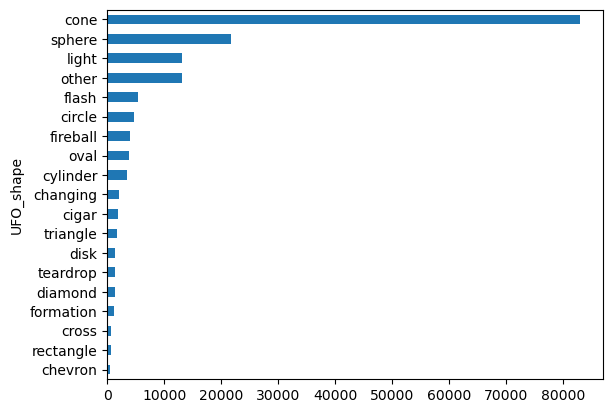

In [29]:
df.groupby("UFO_shape").length_of_encounter_seconds.mean().sort_values().plot(kind="barh")

In [30]:
df.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66516 entries, 0 to 80331
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date_time                    66516 non-null  datetime64[ns]
 1   city                         66516 non-null  object        
 2   state/province               66516 non-null  object        
 3   country                      66516 non-null  object        
 4   UFO_shape                    66516 non-null  object        
 5   length_of_encounter_seconds  66516 non-null  float64       
 6   description                  66516 non-null  object        
 7   latitude                     66516 non-null  float64       
 8   longitude                    66516 non-null  float64       
 9   year                         66516 non-null  int64         
 10  month                        66516 non-null  int64         
 11  is_weekend                   66516 non-nu

In [31]:
# percentage of nulls dropped
14/80

0.175

In [32]:
df.country.value_counts()

us    65114
ca     3000
gb     1905
au      538
de      105
Name: country, dtype: int64

In [33]:
df2 = df.loc[df.country == "us"].reset_index(drop = True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65114 entries, 0 to 65113
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date_time                    65114 non-null  datetime64[ns]
 1   city                         65114 non-null  object        
 2   state/province               65114 non-null  object        
 3   country                      65114 non-null  object        
 4   UFO_shape                    63561 non-null  object        
 5   length_of_encounter_seconds  65114 non-null  float64       
 6   description                  65101 non-null  object        
 7   latitude                     65114 non-null  float64       
 8   longitude                    65114 non-null  float64       
 9   year                         65114 non-null  int64         
 10  month                        65114 non-null  int64         
 11  is_weekend                   65114 non-nu

In [34]:
df2.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63553 entries, 0 to 65113
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date_time                    63553 non-null  datetime64[ns]
 1   city                         63553 non-null  object        
 2   state/province               63553 non-null  object        
 3   country                      63553 non-null  object        
 4   UFO_shape                    63553 non-null  object        
 5   length_of_encounter_seconds  63553 non-null  float64       
 6   description                  63553 non-null  object        
 7   latitude                     63553 non-null  float64       
 8   longitude                    63553 non-null  float64       
 9   year                         63553 non-null  int64         
 10  month                        63553 non-null  int64         
 11  is_weekend                   63553 non-nu

In [35]:
63.5/65

0.9769230769230769

In [36]:
# elminate null values
df2 = df2.dropna().reset_index(drop = True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63553 entries, 0 to 63552
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date_time                    63553 non-null  datetime64[ns]
 1   city                         63553 non-null  object        
 2   state/province               63553 non-null  object        
 3   country                      63553 non-null  object        
 4   UFO_shape                    63553 non-null  object        
 5   length_of_encounter_seconds  63553 non-null  float64       
 6   description                  63553 non-null  object        
 7   latitude                     63553 non-null  float64       
 8   longitude                    63553 non-null  float64       
 9   year                         63553 non-null  int64         
 10  month                        63553 non-null  int64         
 11  is_weekend                   63553 non-nu

In [37]:
df2.to_csv("clean_UFO.csv",index = False)